In [1]:
#tables utils
import pandas as pd
#plot
import matplotlib.pyplot as plt
import seaborn as sns
#data
import wbgapi as wb
import scipy.stats as stats

In [ ]:
# obetener tickers por idnustria
finmodeling_api = "d233d0c6d018a621828c21c00b57bbca"
tickers_techinology = "https://financialmodelingprep.com/api/v3/stock-screener?marketCapMoreThan=1000000000&betaMoreThan=1&volumeMoreThan=10000&sector=Technology&exchange=NASDAQ&dividendMoreThan=0&limit=100&apikey=YOUR_API_KEY"

In [4]:
### Prueba de importacion de excel
ibm_income = pd.read_excel('ibm_income.xlsx',index_col=0)

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [28]:
#get data
gdp = wb.data.DataFrame("NY.GDP.PCAP.CD",["ARG","JPN","WLD","LCN","EUU"]).T
exchange_rate = wb.data.DataFrame("PX.REX.REER",["ARG","JPN"]).T

In [2]:
def remove_non_numbers(df,col):
    '''
    Remove non numerical characters from string column
    '''
    def _temp(x):
        return re.sub("[^0-9]", "", x)
    
    try:
        import re
    except ImportError:
        print("re package not installed")
    if type(col)==list:
        for c in col:
            if df[c].dtype==object:
                #remove with re
                df[c] = df[c].apply(_temp).apply(pd.to_numeric)
                
    else:
        if df[col].dtype==object:
            df[col] = df[col].apply(_temp).apply(pd.to_numeric)

    return df
def small_prepo(df):
    data = df.copy().T
    data["year"] = data.index
    remove_non_numbers(data,"year")
    return data.reset_index(drop=True)

In [19]:
wb.series.info(q="output")

id,value
EG.ELC.RNEW.ZS,Renewable electricity output (% of total electricity output)
,1 elements


In [3]:
economies = ["JPN","WLD","LCN","EUU","USA","CHN"]

gdp = small_prepo(wb.data.DataFrame("NY.GDP.MKTP.CD",economies))
gdp_capita = small_prepo(wb.data.DataFrame("NY.GDP.PCAP.CD",economies))
#interest rate
interest_rate = small_prepo(wb.data.DataFrame("FR.INR.RINR",economies))
lending_interest_rate = small_prepo(wb.data.DataFrame("FR.INR.LEND",economies))
#inflation
consumer_prices = small_prepo(wb.data.DataFrame("FP.CPI.TOTL.ZG",economies))
gdp_deflator = small_prepo(wb.data.DataFrame("NY.GDP.DEFL.KD.ZG",economies))
inflation_gdp_linked = small_prepo(wb.data.DataFrame("NY.GDP.DEFL.KD.ZG.AD",economies))
#broad money
broad_money_growth = small_prepo(wb.data.DataFrame("FM.LBL.BMNY.ZG",economies))
broad_money = small_prepo(wb.data.DataFrame("FM.LBL.BMNY.CN",economies))
#unemployment
total_unemployment = small_prepo(wb.data.DataFrame("SL.UEM.TOTL.ZS",economies))

In [6]:
gdp_growth = small_prepo(wb.data.DataFrame("NY.GDP.MKTP.KD.ZG",economies))

### GDP

In [41]:
broad_money.rolling(5,center=True).median()

economy,CHN,EUU,JPN,LCN,USA,WLD,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.505900e+13,NaN,3.845070e+11,NaN,1962.0
3,NaN,NaN,1.866700e+13,NaN,4.203320e+11,NaN,1963.0
4,NaN,NaN,2.152200e+13,NaN,4.582950e+11,NaN,1964.0
...,...,...,...,...,...,...,...
58,1.792928e+14,NaN,1.381142e+15,NaN,1.834226e+13,NaN,2018.0
59,1.952181e+14,NaN,1.409904e+15,NaN,1.988152e+13,NaN,2019.0
60,2.147664e+14,NaN,1.513826e+15,NaN,NaN,NaN,2020.0
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN


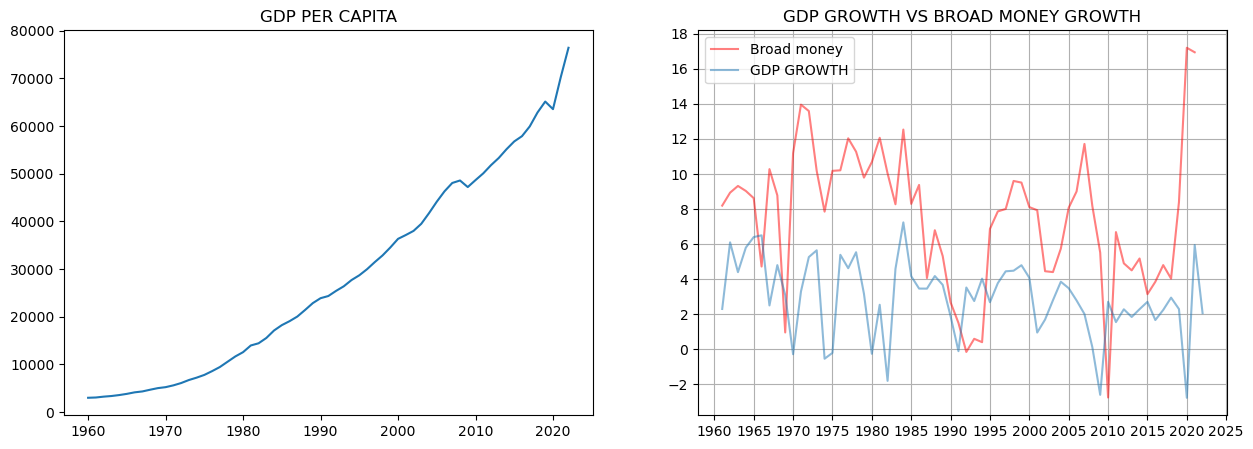

In [36]:
fig,ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].plot(gdp_capita["year"],gdp_capita["USA"])
ax[1].plot(broad_money_growth["year"],broad_money_growth["USA"],c="red",alpha=0.5,label="Broad money")
ax[1].plot(gdp_growth["year"],gdp_growth["USA"],alpha=0.5,label="GDP GROWTH")
ax[0].set_title("GDP PER CAPITA")
ax[1].set_title("GDP GROWTH VS BROAD MONEY GROWTH")
plt.locator_params(nbins=15)
plt.grid()
plt.legend()
plt.show()

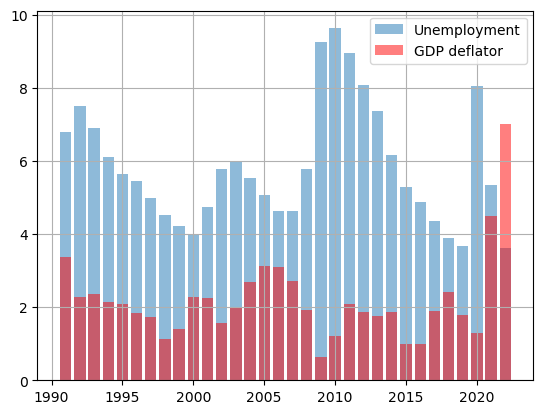

In [76]:
fig,ax = plt.subplots()
ax.bar(total_unemployment["year"][total_unemployment["year"]>1990],total_unemployment["USA"][total_unemployment["year"]>1990],label="Unemployment",alpha=0.5)
ax.bar(gdp_deflator["year"][total_unemployment["year"]>1990],gdp_deflator["USA"][total_unemployment["year"]>1990],color="red",label="GDP deflator",alpha=0.5)
plt.legend()
plt.grid()
plt.show()

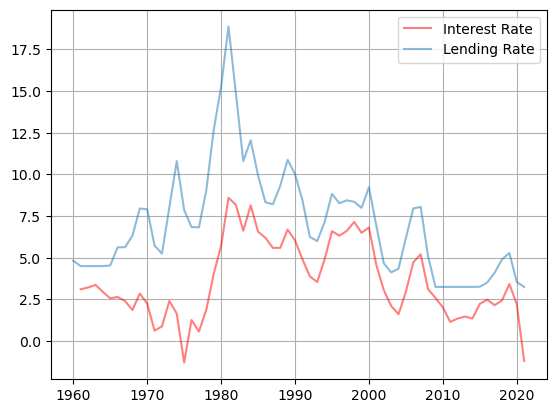

In [14]:
fig,ax =plt.subplots()
ax.plot(interest_rate["year"],interest_rate["USA"],c="red",alpha=0.5,label="Interest Rate")
ax.plot(lending_interest_rate["year"],lending_interest_rate["USA"],alpha=0.5,label="Lending Rate")
plt.legend()
plt.grid()
plt.show()